# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

This experiment is based on the Visualization of filters in CNN. 

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}

In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython

ipython = get_ipython()
  
notebook="M3W9_CS_2_Visualising_CNN" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/CaseStudies/visualization.zip")
    ipython.magic("sx unzip visualization.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [6]:
cat misc_functions.py

import os
import copy
import numpy as np
from PIL import Image
import matplotlib.cm as mpl_color_map

import torch
from torch.autograd import Variable
from torchvision import models


def convert_to_grayscale(im_as_arr):
    """
        Converts 3d image to grayscale

    Args:
        im_as_arr (numpy arr): RGB image with shape (D,W,H)

    returns:
        grayscale_im (numpy_arr): Grayscale image with shape (1,W,D)
    """
    grayscale_im = np.sum(np.abs(im_as_arr), axis=0)
    im_max = np.percentile(grayscale_im, 99)
    im_min = np.min(grayscale_im)
    grayscale_im = (np.clip((grayscale_im - im_min) / (im_max - im_min), 0, 1))
    grayscale_im = np.expand_dims(grayscale_im, axis=0)
    return grayscale_im


def save_gradient_images(gradient, file_name):
    """
        Exports the original gradient image

    Args:
        gradient (np arr): Numpy array of the gradient with shape (3, 224, 224)
        file_name (str): File name to be exported
    """
    if not os.path.exists('.

###Importing required packages


In [0]:
import os
import numpy as np
import torch
from torch.nn import ReLU
from torch.optim import Adam
from torchvision import models
from misc_functions import preprocess_image, recreate_image, save_image, convert_to_grayscale, get_example_params
from matplotlib import pyplot as plt
from tqdm import tqdm

## Gradient visualization with vanilla backpropagation (Standard backpropagation)

* Produces gradients generated with vanilla back propagation from the image
* We use Alexnet for this Visualization

In [0]:
class VanillaBackprop():
    
    def __init__(self, model):
        self.model = model
        self.gradients = None
        # Put model in evaluation mode
        self.model.eval()
        # Hook the first layer to get the gradient
        self.hook_layers()

    def hook_layers(self):
        def hook_function(module, grad_in, grad_out):
            self.gradients = grad_in[0]

        # Register hook to the first layer
        first_layer = list(self.model.features._modules.items())[0][1]
        first_layer.register_backward_hook(hook_function)

    def generate_gradients(self, input_image, target_class):
        # Forward
        model_output = self.model(input_image)
        # Zero grads
        self.model.zero_grad()
        # Target for backprop
        one_hot_output = torch.FloatTensor(1, model_output.size()[-1]).zero_()
        one_hot_output[0][target_class] = 1
        # Backward pass
        model_output.backward(gradient=one_hot_output)
        # Convert Pytorch variable to numpy array
        # [0] to get rid of the first channel (1,3,224,224)
        gradients_as_arr = self.gradients.data.numpy()[0]
        return gradients_as_arr

* Plot the example image by specifying index

* Calculate and plot the  normalized vanilla gradients and grayscale  normalized vanilla gradients of the image


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:09<00:00, 25400663.99it/s]


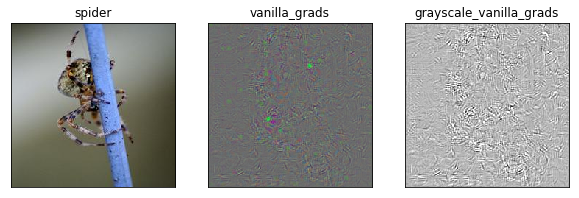

In [7]:
# Specify the index
target_example = 2  # Spider
#Preprocess the image and get the pre-trained alex model for the image
(original_image, prep_img, target_class, file_name_to_export, pretrained_model) = get_example_params(target_example)
#Plot the image
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.title(file_name_to_export)
plt.imshow(original_image)
plt.xticks([])
plt.yticks([])


# Vanilla backprop
VBP = VanillaBackprop(pretrained_model)
# Generate gradients
vanilla_grads = VBP.generate_gradients(prep_img, target_class)
# Calculate the normalized gradients
vanilla_grads = vanilla_grads - vanilla_grads.min()
vanilla_grads /= vanilla_grads.max()
# Plot the normalized the vanilla gradients
plt.subplot(132)
plt.title('vanilla_grads')
plt.imshow(vanilla_grads.transpose(1,2,0))
plt.xticks([])
plt.yticks([])


# Convert the vanilla_grads to grayscale
grayscale_vanilla_grads = convert_to_grayscale(vanilla_grads)
# Normalize the grayscale_vanilla_grads
grayscale_vanilla_grads = grayscale_vanilla_grads - grayscale_vanilla_grads.min()
grayscale_vanilla_grads /= grayscale_vanilla_grads.max()
# Plot the normalized grayscale_vanilla_grads
plt.subplot(133)
plt.title('grayscale_vanilla_grads')
plt.imshow(grayscale_vanilla_grads[0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
pretrained_model.features._modules

OrderedDict([('0',
              Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))),
             ('1', ReLU(inplace)),
             ('2',
              MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)),
             ('3',
              Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))),
             ('4', ReLU(inplace)),
             ('5',
              MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)),
             ('6',
              Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
             ('7', ReLU(inplace)),
             ('8',
              Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
             ('9', ReLU(inplace)),
             ('10',
              Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))),
             ('11', ReLU(inplace)),
             ('12',
              MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1

## Gradient visualization with guided backpropagation


Another way to visualize CNN layers is to visualize activations for a specific input on a specific layer and filter. Below example is obtained from layers/filters of AlexNet for the first image using guided backpropagation. The method is quite similar to backpropagation but instead of guiding the signal from the last layer and a specific target, it guides the signal from a specific layer and filter.

In [0]:
class GuidedBackprop():
    def __init__(self, model):
        self.model = model
        self.gradients = None
        self.forward_relu_outputs = []
        # Put model in evaluation mode
        self.model.eval()
        self.update_relus()
        self.hook_layers()

    def hook_layers(self):
        def hook_function(module, grad_in, grad_out):
            self.gradients = grad_in[0]
        # Register hook to the first layer
        first_layer = list(self.model.features._modules.items())[0][1]
        first_layer.register_backward_hook(hook_function)

    def update_relus(self):
        """
            Updates relu activation functions so that
                1- stores output in forward pass
                2- imputes zero for gradient values that are less than zero
        """
        def relu_backward_hook_function(module, grad_in, grad_out):
            """
            If there is a negative gradient, change it to zero
            """
            # Get last forward output
            corresponding_forward_output = self.forward_relu_outputs[-1]
            corresponding_forward_output[corresponding_forward_output > 0] = 1
            modified_grad_out = corresponding_forward_output * torch.clamp(grad_in[0], min=0.0)
            del self.forward_relu_outputs[-1]  # Remove last forward output
            return (modified_grad_out,)

        def relu_forward_hook_function(module, ten_in, ten_out):
            """
            Store results of forward pass
            """
            self.forward_relu_outputs.append(ten_out)

        # Loop through layers, hook up ReLUs
        for pos, module in self.model.features._modules.items():
            if isinstance(module, ReLU):
                module.register_backward_hook(relu_backward_hook_function)
                module.register_forward_hook(relu_forward_hook_function)

    def generate_gradients(self, input_image, target_class, cnn_layer, filter_pos):
        self.model.zero_grad()
        # Forward pass
        x = input_image
        for index, layer in enumerate(self.model.features):
            # Forward pass layer by layer
            # x is not used after this point because it is only needed to trigger
            # the forward hook function
            x = layer(x)
            # Only need to forward until the selected layer is reached
            if index == cnn_layer:
                # (forward hook function triggered)
                break
        conv_output = torch.sum(torch.abs(x[0, filter_pos]))
        # Backward pass
        conv_output.backward()
        # Convert Pytorch variable to numpy array
        # [0] to get rid of the first channel (1,3,224,224)
        gradients_as_arr = self.gradients.data.numpy()[0]
        return gradients_as_arr

## Visualize activations of the first 30 filters in layer 29 for given input



In [11]:
cnn_layer = 29
target_example = 2  # Spider
(original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
    get_example_params(target_example)

layer_29_filters_visualization = {}
for filter_pos in range(1,31):
    # File export name
    title = file_name_to_export + '_layer' + str(cnn_layer) + '_filter' + str(filter_pos)
    # Guided backprop
    GBP = GuidedBackprop(pretrained_model)
    # Get gradients
    guided_grads = GBP.generate_gradients(prep_img, target_class, cnn_layer, filter_pos)

    guided_grads = guided_grads - guided_grads.min()
    guided_grads /= guided_grads.max()
    layer_29_filters_visualization[title]=guided_grads


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [12]:
fig, ax = plt.subplots(nrows=6, ncols=5, figsize = (40,40))

for r, row in enumerate(ax):
    for c, col in enumerate(row):
        fil_name = file_name_to_export + '_layer29_filter' + str(r*5+c+1)
        col.imshow(layer_29_filters_visualization[fil_name].transpose(1,2,0))
        col.set_xticks([])
        col.set_yticks([])
        col.set_title(fil_name, fontdict={'fontsize':20})

plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Visualize activations of Filter 0 in the first 10 layers of AlexNet for given input

In [0]:
filter_pos = 0
target_example = 2  # Spider
(original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
    get_example_params(target_example)

filter_0_30layers_visualization = {}
for cnn_layer in range(1,11):
    # File export name
    title = file_name_to_export + '_layer' + str(cnn_layer) + '_filter' + str(filter_pos)
    # Guided backprop
    GBP = GuidedBackprop(pretrained_model)
    # Get gradients
    guided_grads = GBP.generate_gradients(prep_img, target_class, cnn_layer, filter_pos)

    guided_grads = guided_grads - guided_grads.min()
    guided_grads /= guided_grads.max()
    filter_0_30layers_visualization[title]=guided_grads


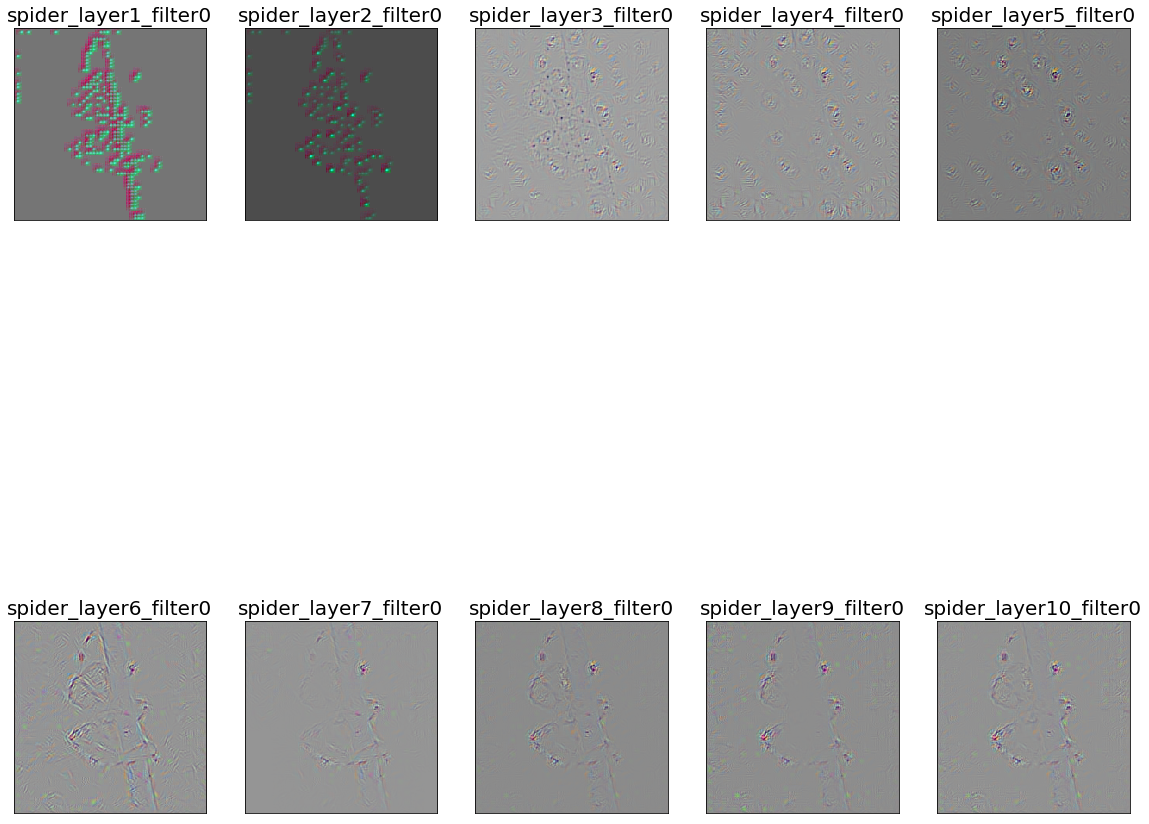

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (20,20))

for r, row in enumerate(ax):
    for c, col in enumerate(row):
        fil_name = file_name_to_export + '_layer'+str(r*5+c+1)+'_filter0'
        col.imshow(filter_0_30layers_visualization[fil_name].transpose(1,2,0))
        col.set_xticks([])
        col.set_yticks([])
        col.set_title(fil_name, fontdict={'fontsize':20})

plt.show()

## Convolutional Neural Network Filter Visualization

* CNN filters can be visualized when we optimize the input image with respect to output of the specific convolution operation. For this example we used a pre-trained VGG16. Visualizations of layers start with basic color and direction filters at lower levels. As we approach towards the final layer the complexity of the filters also increase. If you employ external techniques like blurring, gradient clipping etc. you will probably produce better images



## VGG Net Architecture

* Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
* Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
* Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
* Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
* Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [0]:
class CNNLayerVisualization():
    def __init__(self, model, selected_layer, selected_filter):
        self.model = model
        self.model.eval()
        self.selected_layer = selected_layer
        self.selected_filter = selected_filter
        self.conv_output = 0
        # Create the folder to export images if not exists
        if not os.path.exists('../generated'):
            os.makedirs('../generated')

    def hook_layer(self):
        def hook_function(module, grad_in, grad_out):
            # Gets the conv output of the selected filter (from selected layer)
            self.conv_output = grad_out[0, self.selected_filter]
        # Hook the selected layer
        self.model[self.selected_layer].register_forward_hook(hook_function)

    def visualise_layer_with_hooks(self):
        # Hook the selected layer
        self.hook_layer()
        # Generate a random image
        random_image = np.uint8(np.random.uniform(150, 180, (224, 224, 3)))
        # Process image and return variable
        processed_image = preprocess_image(random_image, False)
        # Define optimizer for the image
        optimizer = Adam([processed_image], lr=0.1, weight_decay=1e-6)
        for i in range(1, 31):
            optimizer.zero_grad()
            # Assign create image to a variable to move forward in the model
            x = processed_image
            for index, layer in enumerate(self.model):
                # Forward pass layer by layer
                # x is not used after this point because it is only needed to trigger
                # the forward hook function
                x = layer(x)
                # Only need to forward until the selected layer is reached
                if index == self.selected_layer:
                    # (forward hook function triggered)
                    break
            # Loss function is the mean of the output of the selected layer/filter
            # We try to minimize the mean of the output of that specific filter
            loss = -torch.mean(self.conv_output)
            #print('Iteration:', str(i), 'Loss:', "{0:.2f}".format(loss.data.numpy()))
            # Backward
            loss.backward()
            # Update image
            optimizer.step()
            # Recreate image
            self.created_image = recreate_image(processed_image)
            # Save image
            if i % 5 == 0:
                im_path = '../generated/layer_vis_l' + str(self.selected_layer) + \
                    '_f' + str(self.selected_filter) + '_iter' + str(i) + '.jpg'
                save_image(self.created_image, im_path)
        return self.created_image  

In [16]:
cnn_layer = 17
filter_visualization_layer_wise = {}
# Fully connected layer is not needed
for filter_pos in tqdm(range(1,26)):
    pretrained_model = models.vgg16(pretrained=True).features
    layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)

    # Layer visualization with pytorch hooks
    filter_visualization_layer_wise['filter_'+str(filter_pos)]=layer_vis.visualise_layer_with_hooks()

  0%|          | 0/25 [00:00<?, ?it/s]Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth

100%|██████████| 25/25 [13:13<00:00, 31.42s/it]


In [17]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize = (30,30))

for r, row in enumerate(ax):
    for c, col in enumerate(row):
        #print(r,c,r*5+c+1 )
        fil_name = 'filter_'+str((r*5+c+1))
        col.imshow(filter_visualization_layer_wise[fil_name])
        col.set_xticks([])
        col.set_yticks([])
        col.set_title(fil_name, fontdict={'fontsize':20})

plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Inverted Representation

* We are using Alexnet for this visualization

## Alexnet Architecture

AlexNet:

Features Extraction:
* Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
* ReLU(inplace)
* MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
* Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
* ReLU(inplace)
* MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
* Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* ReLU(inplace)
* MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)

Classifier-Sequential:
* Dropout(p=0.5)
* Linear(in_features=9216, out_features=4096, bias=True)
* ReLU(inplace)
* Dropout(p=0.5)
* Linear(in_features=4096, out_features=4096, bias=True)
* ReLU(inplace)
* Linear(in_features=4096, out_features=1000, bias=True)



In [0]:
import torch
from torch.autograd import Variable
from torch.optim import SGD
import os
from misc_functions import get_example_params, recreate_image, save_image

In [0]:
class InvertedRepresentation():
    def __init__(self, model):
        self.model = model
        self.model.eval()
        if not os.path.exists('../generated'):
            os.makedirs('../generated')

    def alpha_norm(self, input_matrix, alpha):
        """
            Converts matrix to vector then calculates the alpha norm
        """
        alpha_norm = ((input_matrix.view(-1))**alpha).sum()
        return alpha_norm

    def total_variation_norm(self, input_matrix, beta):
        """
            Total variation norm is the second norm in the paper
            represented as R_V(x)
        """
        to_check = input_matrix[:, :-1, :-1]  # Trimmed: right - bottom
        one_bottom = input_matrix[:, 1:, :-1]  # Trimmed: top - right
        one_right = input_matrix[:, :-1, 1:]  # Trimmed: top - right
        total_variation = (((to_check - one_bottom)**2 +
                            (to_check - one_right)**2)**(beta/2)).sum()
        return total_variation

    def euclidian_loss(self, org_matrix, target_matrix):
        """
            Euclidian loss is the main loss function in the paper
            ||fi(x) - fi(x_0)||_2^2& / ||fi(x_0)||_2^2
        """
        distance_matrix = target_matrix - org_matrix
        euclidian_distance = self.alpha_norm(distance_matrix, 2)
        normalized_euclidian_distance = euclidian_distance / self.alpha_norm(org_matrix, 2)
        return normalized_euclidian_distance

    def get_output_from_specific_layer(self, x, layer_id):
        """
            Saves the output after a forward pass until nth layer
            This operation could be done with a forward hook too
            but this one is simpler
        """
        layer_output = None
        for index, layer in enumerate(self.model.features):
            x = layer(x)
            if str(index) == str(layer_id):
                layer_output = x[0]
                break
        return layer_output

    def generate_inverted_image_specific_layer(self, input_image, img_size, target_layer=3, layers=False):
        # Generate a random image which we will optimize
        opt_img = Variable(1e-1 * torch.randn(1, 3, img_size, img_size), requires_grad=True)
        # Define optimizer for previously created image
        optimizer = SGD([opt_img], lr=1e4, momentum=0.9)
        # Get the output from the model after a forward pass until target_layer
        # with the input image (real image, NOT the randomly generated one)
        input_image_layer_output = \
            self.get_output_from_specific_layer(input_image, target_layer)

        # Alpha regularization parametrs
        # Parameter alpha, which is actually sixth norm
        alpha_reg_alpha = 6
        # The multiplier, lambda alpha
        alpha_reg_lambda = 1e-7

        # Total variation regularization parameters
        # Parameter beta, which is actually second norm
        tv_reg_beta = 2
        # The multiplier, lambda beta
        tv_reg_lambda = 1e-8
        inverted_images_for_iterations = {}
        for i in range(201):
            optimizer.zero_grad()
            # Get the output from the model after a forward pass until target_layer
            # with the generated image (randomly generated one, NOT the real image)
            output = self.get_output_from_specific_layer(opt_img, target_layer)
            # Calculate euclidian loss
            euc_loss = 1e-1 * self.euclidian_loss(input_image_layer_output.detach(), output)
            # Calculate alpha regularization
            reg_alpha = alpha_reg_lambda * self.alpha_norm(opt_img, alpha_reg_alpha)
            # Calculate total variation regularization
            reg_total_variation = tv_reg_lambda * self.total_variation_norm(opt_img,
                                                                            tv_reg_beta)
            # Sum all to optimize
            loss = euc_loss + reg_alpha + reg_total_variation
            # Step
            loss.backward()
            optimizer.step()
            # Generate image every 5 iterations
            if i % 5 == 0:
                print('Iteration:', str(i), 'Loss:', loss.data.numpy())
                recreated_im = recreate_image(opt_img)
                inverted_images_for_iterations['Iteration'+str(i)]=recreated_im
                im_path = '../generated/Inv_Image_Layer_' + str(target_layer) + \
                    '_Iteration_' + str(i) + '.jpg'
                save_image(recreated_im, im_path)

            # Reduce learning rate every 40 iterations
            if i % 40 == 0:
                for param_group in optimizer.param_groups:
                    param_group['lr'] *= 1/10
        if layers:
            return recreated_im
        return inverted_images_for_iterations
            

In [21]:
target_example = 2  # 2:spider; 0:snake; 1:dog
(original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
    get_example_params(target_example)

inverted_representation = InvertedRepresentation(pretrained_model)
image_size = 224  # width & height
target_layer = 4
inverted_images = inverted_representation.generate_inverted_image_specific_layer(prep_img,
                                                               image_size,
                                                               target_layer)


Iteration: 0 Loss: 0.09775131
Iteration: 5 Loss: 0.06360121
Iteration: 10 Loss: 0.04247677
Iteration: 15 Loss: 0.027681466
Iteration: 20 Loss: 0.01988843
Iteration: 25 Loss: 0.01586744
Iteration: 30 Loss: 0.013494676
Iteration: 35 Loss: 0.011762667
Iteration: 40 Loss: 0.010409293
Iteration: 45 Loss: 0.010050013
Iteration: 50 Loss: 0.009850889
Iteration: 55 Loss: 0.009669285
Iteration: 60 Loss: 0.009505752
Iteration: 65 Loss: 0.0093570845
Iteration: 70 Loss: 0.009219063
Iteration: 75 Loss: 0.009092105
Iteration: 80 Loss: 0.008975575
Iteration: 85 Loss: 0.008943197
Iteration: 90 Loss: 0.008930374
Iteration: 95 Loss: 0.008917978
Iteration: 100 Loss: 0.008905953
Iteration: 105 Loss: 0.0088942945
Iteration: 110 Loss: 0.008882945
Iteration: 115 Loss: 0.008871875
Iteration: 120 Loss: 0.008861054
Iteration: 125 Loss: 0.008857996
Iteration: 130 Loss: 0.008856833
Iteration: 135 Loss: 0.008855705
Iteration: 140 Loss: 0.0088546015
Iteration: 145 Loss: 0.008853515
Iteration: 150 Loss: 0.008852442
I

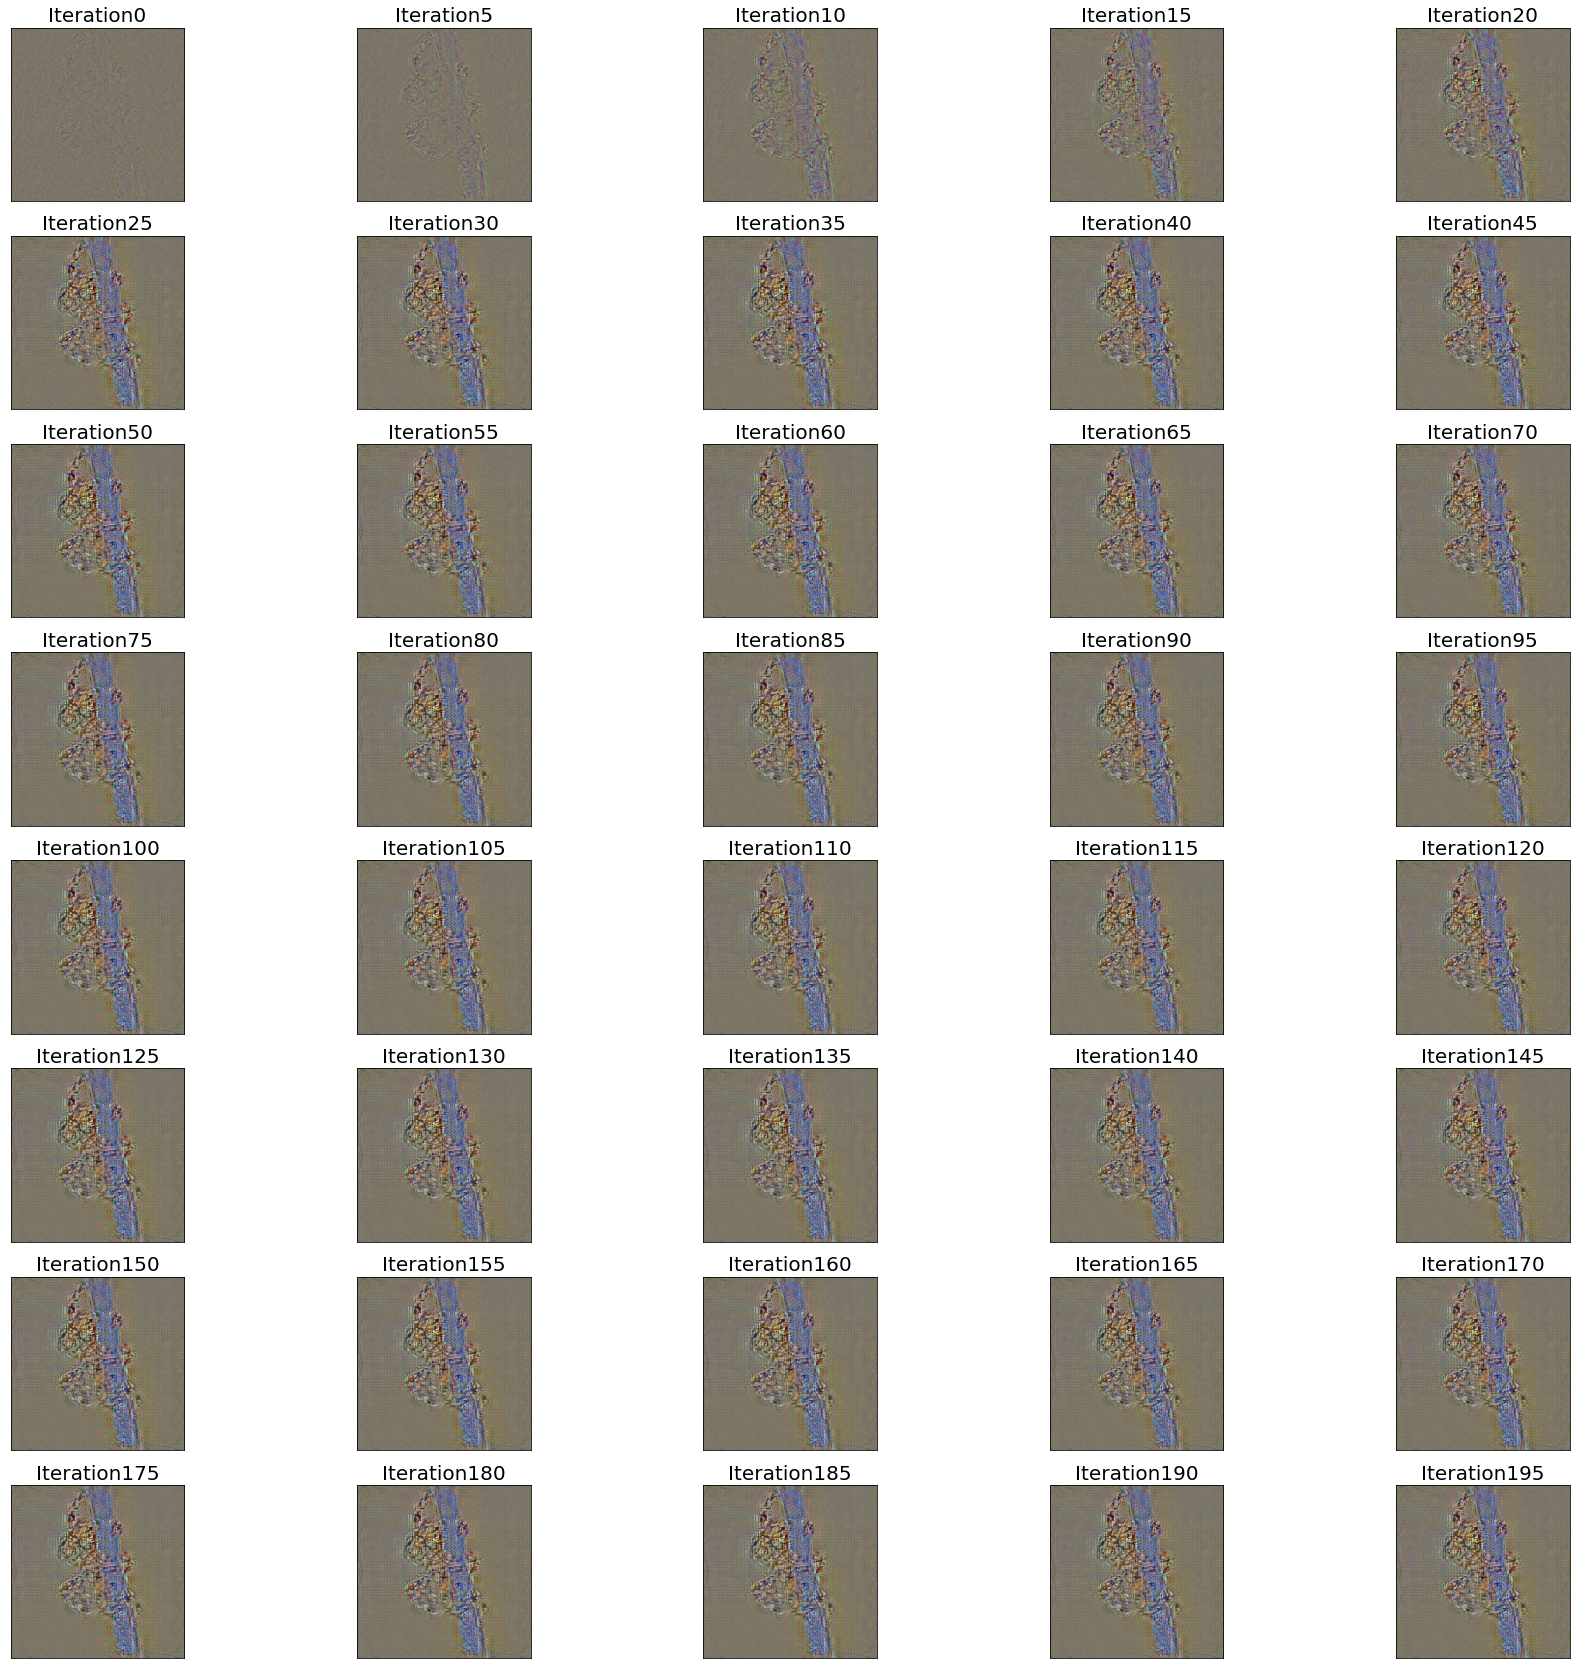

In [22]:
fig, ax = plt.subplots(nrows=8, ncols=5, figsize = (30,30))

for r, row in enumerate(ax):
    for c, col in enumerate(row):
        fil_name = 'Iteration'+str((r*5+c)*5)
        col.imshow(inverted_images[fil_name])
        col.set_xticks([])
        col.set_yticks([])
        col.set_title(fil_name, fontdict={'fontsize':20})

plt.show()

In [23]:
target_example = 2  # spider; 0:snake; 1:dog
(original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
    get_example_params(target_example)

inverted_representation_per_layer= {}
inverted_representation = InvertedRepresentation(pretrained_model)
image_size = 224  # width & height
for target_layer in range(10):
    (original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
    get_example_params(target_example)
    inverted_representation = InvertedRepresentation(pretrained_model)
    inverted_image = inverted_representation.generate_inverted_image_specific_layer(prep_img,
                                                               image_size,
                                                               target_layer, layers= True)
    inverted_representation_per_layer[target_layer]= inverted_image

Iteration: 0 Loss: 0.07556996
Iteration: 5 Loss: 0.05616238
Iteration: 10 Loss: 0.04075569
Iteration: 15 Loss: 0.029446652
Iteration: 20 Loss: 0.023110677
Iteration: 25 Loss: 0.019451376
Iteration: 30 Loss: 0.017000029
Iteration: 35 Loss: 0.015309524
Iteration: 40 Loss: 0.014144354
Iteration: 45 Loss: 0.013882295
Iteration: 50 Loss: 0.013788578
Iteration: 55 Loss: 0.013695761
Iteration: 60 Loss: 0.013605696
Iteration: 65 Loss: 0.013519369
Iteration: 70 Loss: 0.013437136
Iteration: 75 Loss: 0.013358966
Iteration: 80 Loss: 0.013284624
Iteration: 85 Loss: 0.013264486
Iteration: 90 Loss: 0.013257483
Iteration: 95 Loss: 0.013250567
Iteration: 100 Loss: 0.013243715
Iteration: 105 Loss: 0.013236914
Iteration: 110 Loss: 0.013230153
Iteration: 115 Loss: 0.013223425
Iteration: 120 Loss: 0.013216727
Iteration: 125 Loss: 0.013214858
Iteration: 130 Loss: 0.013214192
Iteration: 135 Loss: 0.013213529
Iteration: 140 Loss: 0.013212864
Iteration: 145 Loss: 0.013212199
Iteration: 150 Loss: 0.0132115325
I

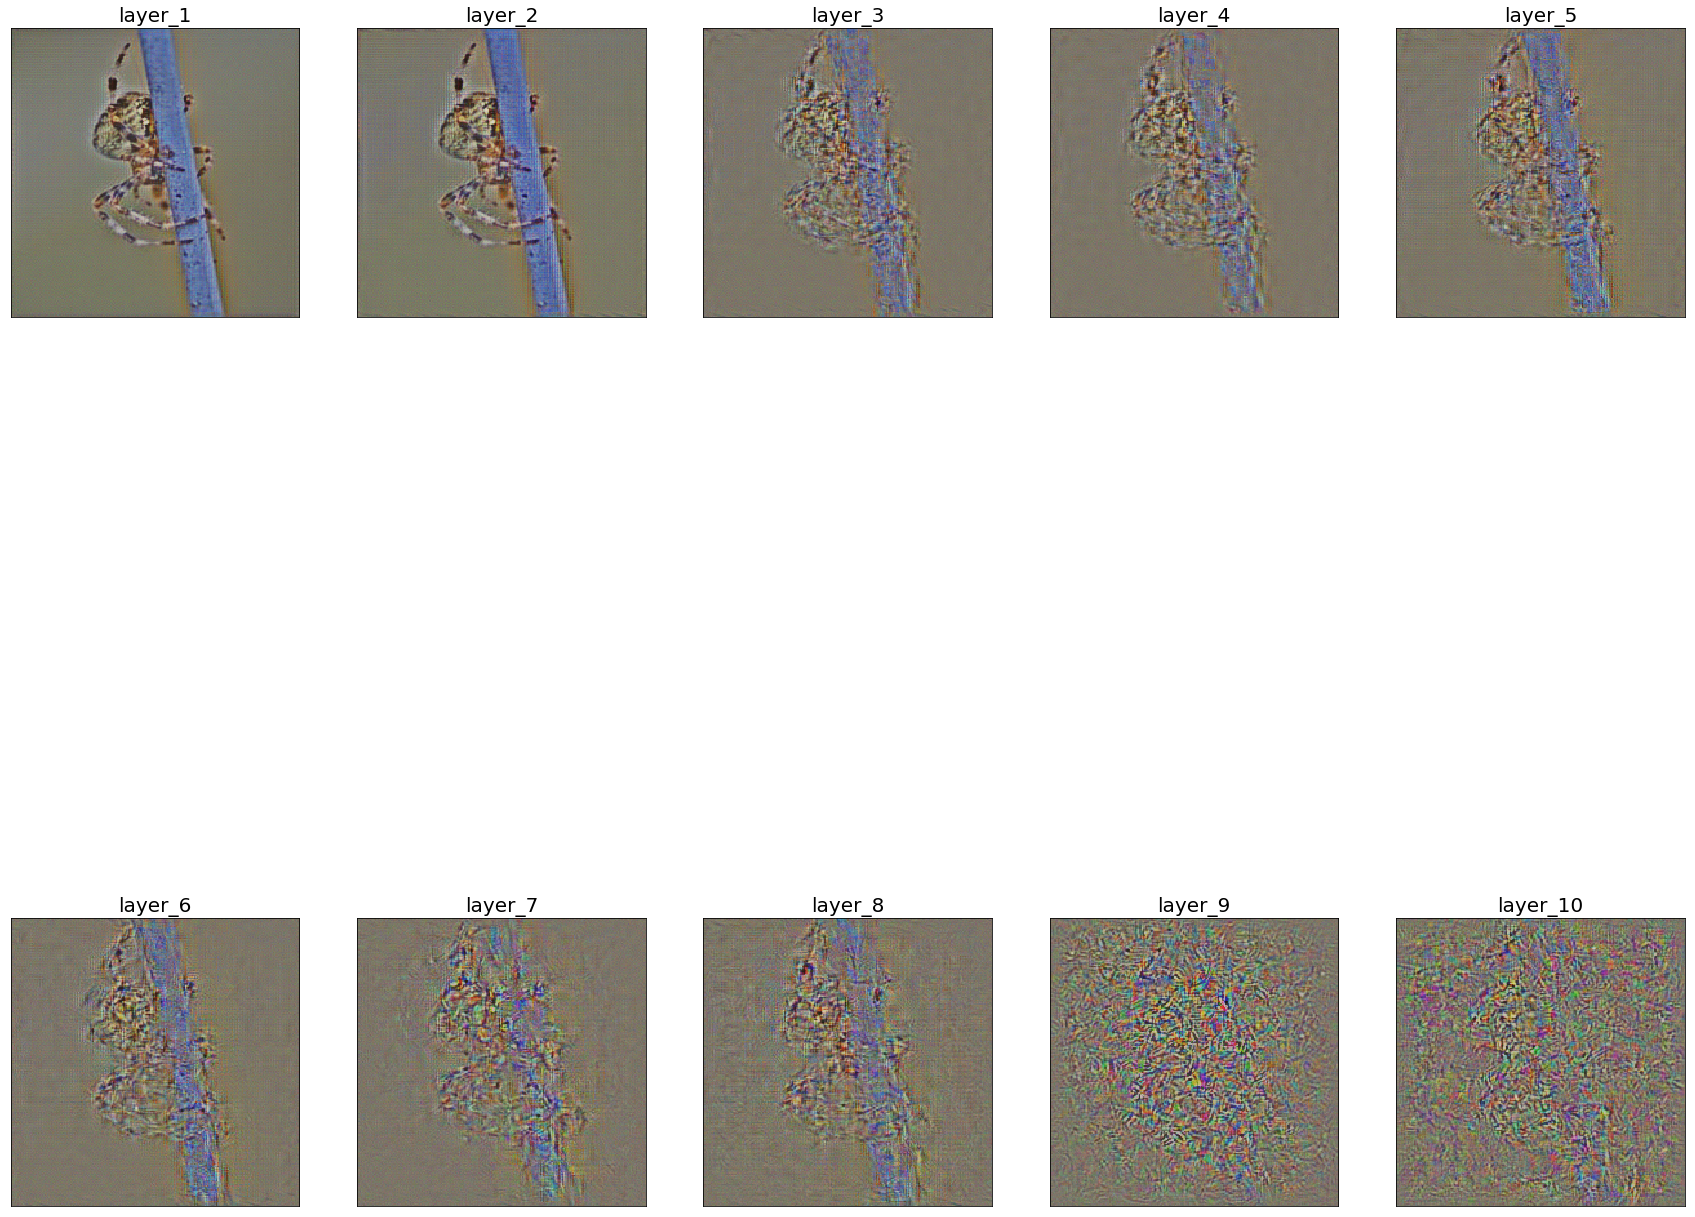

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (30,30))

for r, row in enumerate(ax):
    for c, col in enumerate(row):
        fil_name = (r*5+c)
        col.imshow(inverted_representation_per_layer[fil_name])
        col.set_xticks([])
        col.set_yticks([])
        col.set_title('layer_'+str(fil_name+1), fontdict={'fontsize':20})

plt.show()

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test'\"" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [28]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 5644
Date of submission:  27 May 2019
Time of submission:  22:19:59
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
